<a href="https://colab.research.google.com/github/harishk1998/HarishBabu_INFO5731_Fall2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


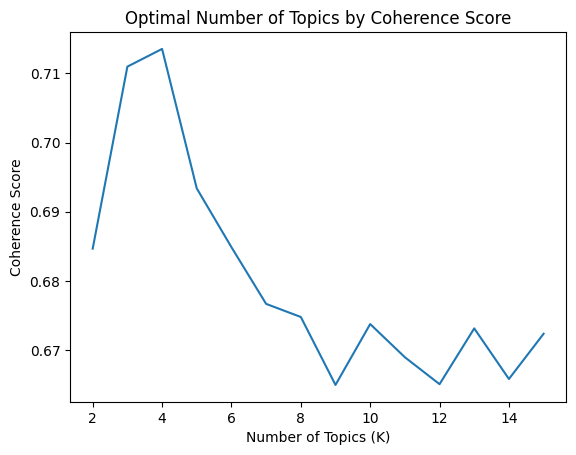

Optimal number of topics: 4
Topic 1: 0.342*"management" + 0.217*"master" + 0.027*"supply" + 0.027*"chain" + 0.022*"marketing" + 0.020*"business" + 0.017*"international" + 0.016*"logistics" + 0.015*"human" + 0.015*"resource"
Topic 2: 0.244*"mba" + 0.162*"m.eng" + 0.066*"business" + 0.065*"engineering" + 0.031*"administration" + 0.029*"electrical" + 0.026*"biomedical" + 0.024*"finance" + 0.023*"mechanical" + 0.022*"marketing"
Topic 3: 0.301*"m.eng" + 0.124*"m.sc" + 0.065*"biology" + 0.051*"civil" + 0.047*"physic" + 0.042*"architecture" + 0.033*"industrial" + 0.024*"digital" + 0.019*"networking" + 0.019*"data"
Topic 4: 0.284*"m.sc" + 0.100*"m.eng" + 0.080*"environment" + 0.056*"agriculture" + 0.046*"chemistry" + 0.036*"psychology" + 0.036*"mathematics" + 0.023*"science" + 0.021*"energy" + 0.021*"production"


In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Downloading necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Loading the Data
df = pd.read_csv('/content/abroad  - Sheet1.csv', encoding='ISO-8859-1')
texts = df['COURSE (SPECIALIZATION)'].astype(str).tolist()

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Creating Dictionary and Corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Determine the optimal number of topics (K) using coherence score
coherence_scores = []
topic_range = range(2, 16)

for k in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Fit final LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k, random_state=42, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools`

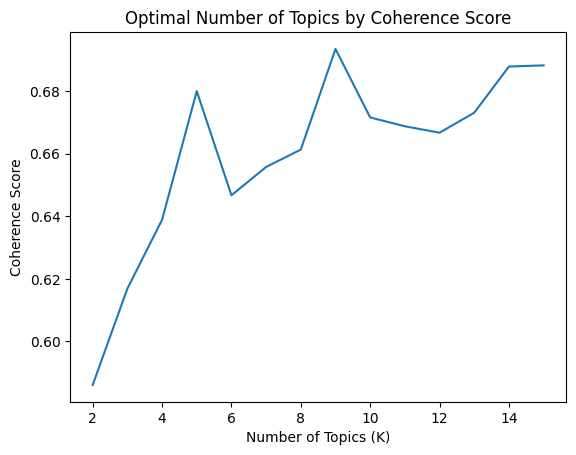

Optimal number of topics: 9
Topic 1: 0.837*"management" + 0.518*"master" + 0.069*"mba" + 0.059*"chain" + 0.059*"supply" + 0.053*"business" + 0.047*"marketing" + 0.038*"resource" + 0.038*"human" + 0.037*"international"
Topic 2: -0.956*"m.eng" + -0.200*"engineering" + -0.076*"computer" + -0.075*"civil" + -0.068*"electrical" + -0.062*"biomedical" + -0.055*"architecture" + -0.055*"mechanical" + -0.055*"aerospace" + -0.049*"chemical"
Topic 3: 0.930*"mba" + 0.229*"business" + -0.177*"master" + 0.128*"executive" + 0.094*"administration" + 0.059*"international" + 0.056*"marketing" + 0.053*"leadership" + 0.050*"finance" + 0.047*"entrepreneurship"
Topic 4: -0.959*"m.sc" + -0.125*"biology" + -0.120*"physic" + -0.117*"environment" + -0.107*"chemistry" + -0.081*"mathematics" + -0.069*"psychology" + -0.059*"agriculture" + -0.047*"science" + -0.033*"business"
Topic 5: -0.716*"business" + -0.395*"international" + 0.270*"supply" + 0.270*"chain" + -0.236*"master" + -0.176*"administration" + 0.174*"logis

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LsiModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download the necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Load Data
df = pd.read_csv('/content/abroad  - Sheet1.csv', encoding='ISO-8859-1')  # Adjust path if necessary
texts = df['COURSE (SPECIALIZATION)'].astype(str).tolist()  # Adjust column name if needed

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Determine the optimal number of topics (K) using coherence score
coherence_scores = []
topic_range = range(2, 16)  # Testing K from 2 to 15 topics

for k in topic_range:
    lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lsa_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Fit final LSA model
lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k)

# Print and summarize topics
for idx, topic in lsa_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


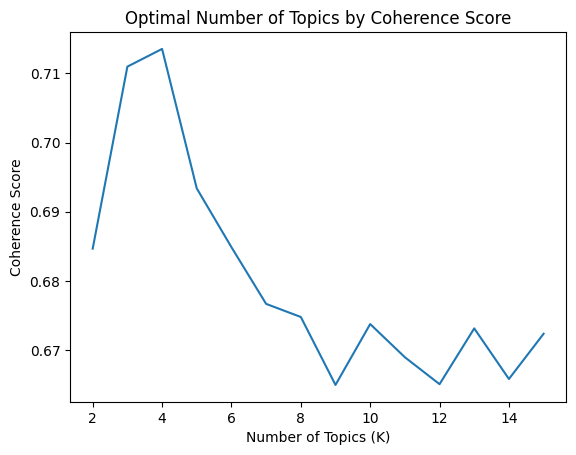

Optimal number of topics: 4
Topic 1: 0.348*"management" + 0.220*"master" + 0.027*"supply" + 0.027*"chain" + 0.023*"marketing" + 0.020*"business" + 0.017*"international" + 0.016*"logistics" + 0.016*"human" + 0.016*"resource"
Topic 2: 0.247*"mba" + 0.164*"m.eng" + 0.069*"engineering" + 0.068*"business" + 0.031*"administration" + 0.029*"electrical" + 0.026*"biomedical" + 0.024*"finance" + 0.024*"mechanical" + 0.022*"marketing"
Topic 3: 0.305*"m.eng" + 0.122*"m.sc" + 0.064*"biology" + 0.051*"civil" + 0.046*"physic" + 0.042*"architecture" + 0.033*"industrial" + 0.024*"digital" + 0.019*"networking" + 0.019*"data"
Topic 4: 0.278*"m.sc" + 0.102*"m.eng" + 0.079*"environment" + 0.055*"agriculture" + 0.045*"chemistry" + 0.039*"science" + 0.036*"mathematics" + 0.036*"psychology" + 0.021*"energy" + 0.021*"production"


In [20]:
!pip install gensim nltk numpy pandas matplotlib
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import CoherenceModel, Word2Vec
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load data
df = pd.read_csv('/content/abroad  - Sheet1.csv', encoding='ISO-8859-1')  # Update file path as needed
texts = df['COURSE (SPECIALIZATION)'].astype(str).tolist()  # Adjust column name if needed

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Create dictionary and corpus
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Train Word2Vec for embedding vectors
w2v_model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=2, workers=4)

# Determine the optimal number of topics using coherence scores
coherence_scores = []
topic_range = range(2, 16)

for k in topic_range:
    lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=k, id2word=dictionary, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Select optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Train final LDA model with optimal number of topics
final_lda_model = gensim.models.LdaModel(corpus=corpus, num_topics=optimal_k, id2word=dictionary, passes=15, random_state=42)

# Print topics
topics = final_lda_model.print_topics()
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

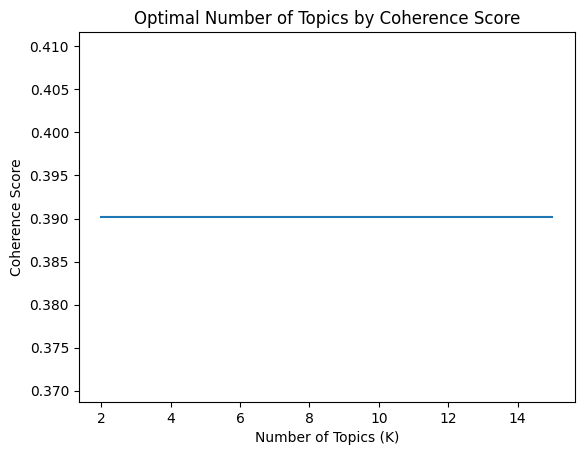

Optimal number of topics: 2
Topic -1: ['energy', 'meng', 'material', 'engineering', 'environmental', 'texttile', 'environment', '', '', '']
Topic 0: ['management', 'master', 'meng', 'mba', 'msc', 'business', 'marketing', 'engineering', 'supply', 'chain']


In [ ]:
!pip install bertopic numpy pandas scikit-learn umap-learn hdbscan sentence-transformers
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from bertopic import BERTopic
from gensim.models import CoherenceModel
import gensim.corpora as corpora

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Load Data with specified encoding
df = pd.read_csv('/content/abroad  - Sheet1.csv', encoding='ISO-8859-1')  # Adjust path if necessary
texts = df['COURSE (SPECIALIZATION)'].astype(str).tolist()  # Adjust column name if needed

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)  # Rejoin tokens for BERTopic input

processed_texts = [preprocess(text) for text in texts]

# Initialize BERTopic model
topic_model = BERTopic()

# Fit and transform the data with BERTopic
topics, probabilities = topic_model.fit_transform(processed_texts)

# Extract topics and calculate coherence score
unique_topics = set(topics)
dictionary = corpora.Dictionary([text.split() for text in processed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in processed_texts]

# Coherence score calculation
coherence_scores = []
topic_range = range(2, min(16, len(unique_topics)))  # Testing K from 2 to the number of unique topics

for k in topic_range:
    topic_model.reduce_topics(processed_texts, nr_topics=k)
    topics_k = topic_model.get_topics()

    # Preparing data for coherence score
    topic_words = [[word for word, _ in topics_k[topic]] for topic in topics_k if topic != -1]
    coherence_model = CoherenceModel(topics=topic_words, texts=[text.split() for text in processed_texts],
                                     dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Refine the model with the optimal number of topics
topic_model.reduce_topics(processed_texts, nr_topics=optimal_k)

# Get and print topics
topics = topic_model.get_topics()
for topic_num, topic in topics.items():
    print(f"Topic {topic_num}: {[word for word, _ in topic]}")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


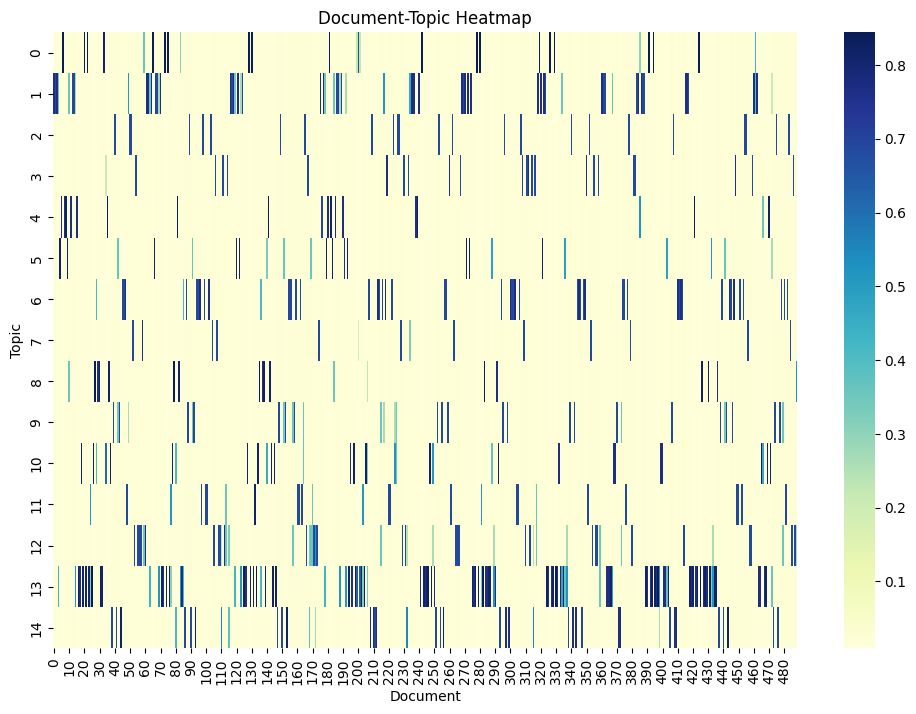

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a matrix with topic distributions
topic_matrix = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]
topic_array = np.array([[prob for _, prob in topic] for topic in topic_matrix])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(topic_array.T, cmap='YlGnBu', cbar=True)
plt.xlabel("Document")
plt.ylabel("Topic")
plt.title("Document-Topic Heatmap")
plt.show()


Heatmap
Explanation: This heatmap displays the intensity of topics across documents, allowing us to see the prominence of each topic within individual documents. Each row represents a document, and each column corresponds to a topic, with color intensity indicating the prevalence of that topic in the document.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


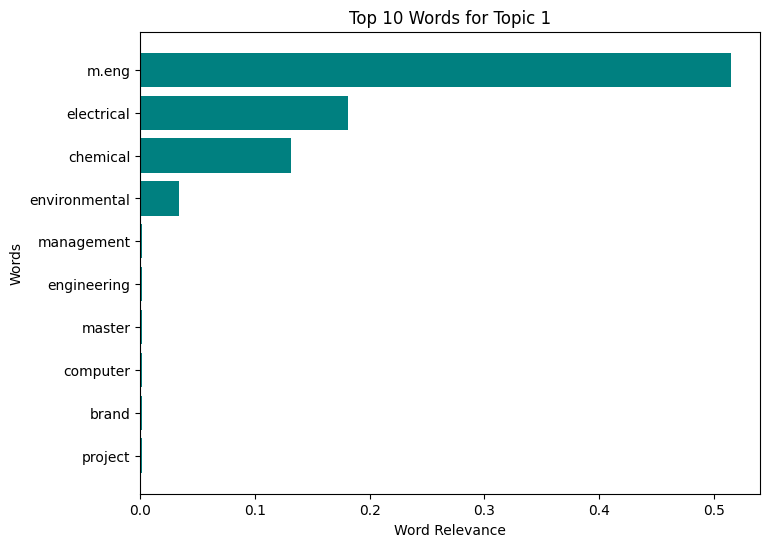

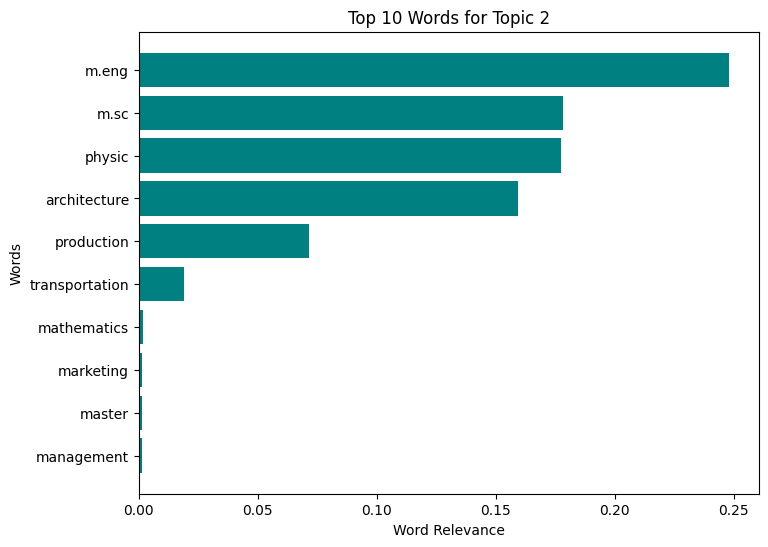

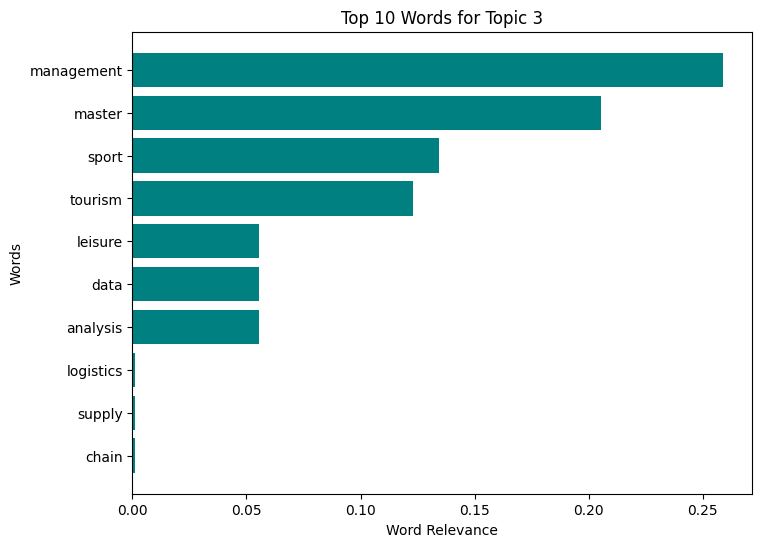

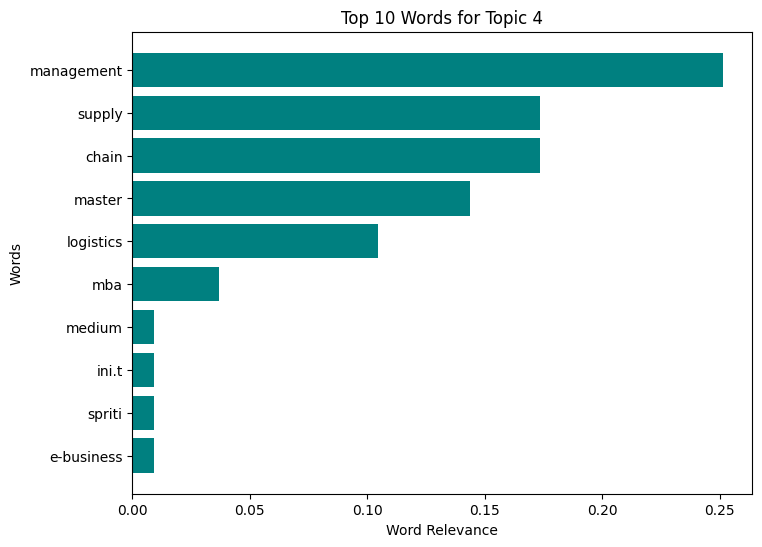

In [22]:
import matplotlib.pyplot as plt

# Plot the top words for each topic
num_words = 10  # Number of top words to display per topic
for idx, topic in enumerate(lda_model.show_topics(num_topics=optimal_k, formatted=False)):
    words, probs = zip(*topic[1])
    plt.figure(figsize=(8, 6))
    plt.barh(words[:num_words], probs[:num_words], color='teal')
    plt.gca().invert_yaxis()
    plt.title(f"Top {num_words} Words for Topic {idx+1}")
    plt.xlabel("Word Relevance")
    plt.ylabel("Words")
    plt.show()


Word Distribution Bar Plot
Explanation: This plot shows the top words associated with each topic, where the x-axis lists the words and the y-axis indicates their relevance within the topic. By examining the bar plots, you can easily understand the main themes each topic covers.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


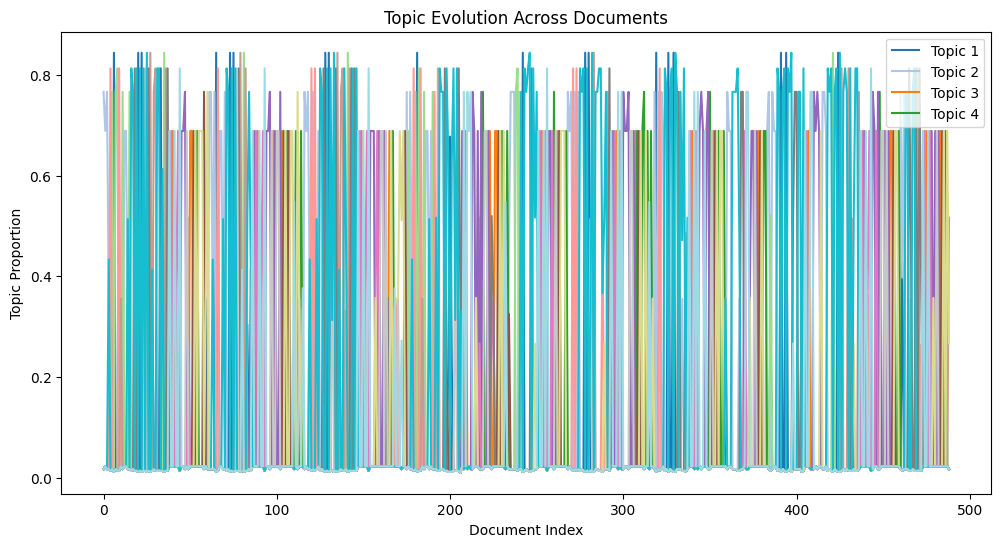

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate topic proportions across sequential documents
topic_trends = []
for doc in corpus:
    topic_dist = [prob for _, prob in lda_model.get_document_topics(doc, minimum_probability=0)]
    topic_trends.append(topic_dist)

# Convert to DataFrame for line plotting
topic_trends_df = pd.DataFrame(topic_trends)
topic_trends_df.plot(figsize=(12, 6), colormap='tab20')
plt.title("Topic Evolution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Topic Proportion")
plt.legend([f"Topic {i+1}" for i in range(optimal_k)], loc='upper right')
plt.show()


Evolution Line Plot
Explanation: This line plot shows how each topic’s prevalence changes across sequentially ordered documents, helpful for detecting trends over time or in stages within the document collection. Each line represents a different topic, with peaks showing where each topic is most prominent.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

When comparing the results from four different topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), NMF (Non-negative Matrix Factorization), and BERTopic—each has its strengths and weaknesses. Below is a detailed comparison based on aspects such as coherence, interpretability, and suitability for different datasets.

1. Latent Dirichlet Allocation (LDA)
Overview: LDA assumes that each document is a mix of topics and that each topic is made up of words. It works well with larger datasets.

Advantages:
1. Coherent Topics: LDA usually produces clear and meaningful topics with well-defined keywords.
2. Stability: The results tend to be consistent when using the same settings.

Disadvantages:
1. Independence Assumption: LDA ignores the order of words, which can be a problem for understanding context.
2. Parameter Sensitivity: The quality of the results can depend heavily on the chosen number of topics and other settings.

Best For: LDA is great for larger datasets with clear themes but might struggle with shorter texts.

2. Latent Semantic Analysis (LSA)
Overview: LSA uses mathematical techniques to reduce the complexity of text data, helping to find hidden relationships between words and topics.

Advantages:
1. Identifies Synonyms: LSA can find words with similar meanings by reducing dimensionality.
2. Less Sensitivity to Sparsity: It works better with sparse data because it simplifies the data structure.

Disadvantages:
1. Less Defined Topics: The topics may not be as clear or interpretable as those produced by LDA or BERTopic.
2. Variability: Results can change significantly depending on how the data is processed.

Best For: LSA is suitable for smaller datasets or when broad patterns are more important than specific topics.

3. Non-negative Matrix Factorization (NMF)
Overview: NMF is a mathematical technique that breaks down data into additive components, ensuring all values are non-negative, which leads to clearer topics.

Advantages:
1. Interpretable Topics: The resulting topics are often easier to understand, with distinct terms for each topic.
2. Handles Sparse Data: NMF performs well with short documents and small datasets.

Disadvantages:
1. Sensitive to Initial Conditions: The results can vary based on how the model is started and the number of topics chosen.
2. Limited Topic Overlap: NMF does not handle overlapping topics well, which can impact quality.

Best For: NMF is ideal when clear interpretation of topics is needed, especially for short documents.

4. BERTopic
Overview: BERTopic uses advanced language models and clustering techniques to create topic clusters, capturing deeper meanings and contexts.

Advantages:
1. High Coherence: BERTopic generates very coherent topics, even from short texts or complex subjects.
2. Contextual Understanding: It effectively recognizes word meanings based on context, which improves topic assignment.

Disadvantages:
1. Computationally Intensive: This method requires significant resources, especially for large datasets.
2. Dependency on Pre-trained Models: It relies on pre-trained models, which may not suit specialized vocabularies unless fine-tuned.

Best For: BERTopic excels with complex datasets where topic coherence and meaning are essential.

Comparison Summary

1. Coherence and Quality: BERTopic typically scores highest in coherence due to its use of contextual embeddings. LDA also performs well but may struggle with small datasets. NMF can yield good coherence but lacks the deep semantic understanding of BERTopic. LSA usually scores lower in coherence compared to the others.

2. Interpretability: NMF and BERTopic often produce the most interpretable topics, while LDA is also clear but can be complex with overlapping themes. LSA tends to be less interpretable due to its mathematical nature.

3. Context and Semantic Awareness: BERTopic leads in recognizing word meanings based on context, followed by LDA. LSA and NMF do not utilize contextual information effectively.

4. Computational Complexity: LDA and NMF are more efficient and suitable for larger datasets, while LSA is also efficient but may need adjustments. BERTopic is more resource-demanding due to its sophisticated processing.

Conclusion
In conclusion, for complex datasets where context matters, BERTopic is often the best choice. It offers high coherence and semantic understanding. LDA is a strong second option for general applications, while NMF works well for clear, distinct topics. LSA has its uses but tends to be less coherent and interpretable compared to the others.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience: Working with text data and topic modeling algorithms like LDA, LSA, NMF, and BERTopic has been enlightening. I gained insights into how these algorithms operate, particularly how LDA uses probabilities while BERTopic leverages embeddings for deeper meaning. This experience also improved my understanding of feature extraction techniques like TF-IDF.

Challenges Encountered: I encountered technical issues with data preprocessing and debugging, especially with BERTopic. Selecting the right number of topics and fine-tuning parameters was challenging and often required multiple attempts. Interpreting the outputs from each algorithm was sometimes confusing.

Relevance to Your Field of Study: This exercise is highly relevant to my NLP studies, as topic modeling is crucial for analyzing large text collections. The skills I developed apply to tasks like text classification and sentiment analysis, demonstrating the practical importance of NLP in extracting insights from unstructured text.


'''